In [1]:
import SimpleITK as sitk
import numpy as np
import scipy.ndimage
import matplotlib.pyplot as plt
import cv2

def load_itk(filename):
    # Reads the image using SimpleITK
    itkimage = sitk.ReadImage(filename)

    # Convert the image to a  numpy array first and then shuffle the dimensions to get axis in the order z,y,x
    ct_scan = sitk.GetArrayFromImage(itkimage)

    # Read the origin of the ct_scan, will be used to convert the coordinates from world to voxel and vice versa.
    origin = np.array(list(reversed(itkimage.GetOrigin())))

    # Read the spacing along each dimension
    spacing = np.array(list(reversed(itkimage.GetSpacing())))

    return ct_scan, origin, spacing

def load_x(path):# load x 3d image
    img, origin, spacing = load_itk(path)
    
    #calculate resize factor
    RESIZE_SPACING = [1, 1, 1]
    resize_factor = spacing / RESIZE_SPACING
    new_real_shape = img.shape * resize_factor
    new_shape = np.round(new_real_shape)
    real_resize = new_shape / img.shape
    new_spacing = spacing / real_resize
    #resize image
    resized_img = scipy.ndimage.interpolation.zoom(img, real_resize)
    
    print(resized_img.shape)
    normalized_img = ((resized_img - np.min(resized_img)) / (np.max(resized_img) - np.min(resized_img))) * 255
    return normalized_img

In [2]:
x = load_x('../data/Jack/images/case1.mhd')

(559, 160, 160)


True

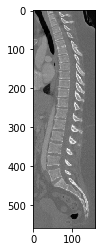

In [3]:
z = 90
plt.imshow(x[:,:,z], cmap='gray')
cv2.imwrite('../darknet/data/ian/test/script.png', x[:,:,90])

In [8]:
#os.chdir('../script')

In [4]:
# YOLO predict

import subprocess
import os

origin_dir = os.getcwd()
os.chdir('../darknet')

#cmdstr = './darknet detector test cfg/ian.data cfg/yolov3-ian.cfg backup/yolov3-ian_50000.weights data/ian/test/case1_97.jpg'
cmdstr = './darknet detector test cfg/ian.data cfg/yolov3-ian.cfg backup/yolov3-ian_50000.weights -dont_show -ext_output < {} > {}'.format('data/ian/test/script.txt', 'data/ian/test/script_result.txt')
print(cmdstr)

detect_result = subprocess.check_output(cmdstr, shell = True)

os.chdir(origin_dir)

print('== YOLO pedicted ==')

./darknet detector test cfg/ian.data cfg/yolov3-ian.cfg backup/yolov3-ian_50000.weights -dont_show -ext_output < data/ian/test/script.txt > data/ian/test/script_result.txt
== YOLO pedicted ==


In [5]:
# Load YOLO predict result

import re

yolo_result = []

with open('../darknet/data/ian/test/script_result.txt', 'r') as f:
    content = f.read().split('Enter Image Path:')
    result = content[1].split('\n')
    del result[0], result[-1]
    
    for line in result:
        yolo_result.append({
            'label': line.split(':')[0],
            #'confidence': int(re.sub("\D", "", line.split('%')[0].split(':')[1])),
            'left_x': int(re.sub("\D", "", line.split(':')[2])),
            'top_y': int(re.sub("\D", "", line.split(':')[3])),
            'center_x': int(int(re.sub("\D", "", line.split(':')[2])) + int(re.sub("\D", "", line.split(':')[4]))/2),
            'center_y': int(int(re.sub("\D", "", line.split(':')[3])) + int(re.sub("\D", "", line.split(':')[4]))/2),
            'w': int(re.sub("\D", "", line.split(':')[4])),
            'h': int(re.sub("\D", "", line.split(':')[4])),
        })

for i in yolo_result:
    print(i)

{'label': 'L4', 'left_x': 36, 'top_y': 369, 'center_x': 67, 'center_y': 400, 'w': 63, 'h': 63}
{'label': 'L5', 'left_x': 36, 'top_y': 403, 'center_x': 66, 'center_y': 433, 'w': 61, 'h': 61}
{'label': 'L3', 'left_x': 37, 'top_y': 335, 'center_x': 70, 'center_y': 368, 'w': 67, 'h': 67}
{'label': 'C7', 'left_x': 38, 'top_y': 2, 'center_x': 67, 'center_y': 31, 'w': 59, 'h': 59}
{'label': 'T1', 'left_x': 43, 'top_y': 20, 'center_x': 72, 'center_y': 49, 'w': 59, 'h': 59}
{'label': 'L2', 'left_x': 43, 'top_y': 305, 'center_x': 82, 'center_y': 344, 'w': 79, 'h': 79}
{'label': 'T2', 'left_x': 48, 'top_y': 39, 'center_x': 71, 'center_y': 62, 'w': 47, 'h': 47}
{'label': 'L1', 'left_x': 49, 'top_y': 278, 'center_x': 87, 'center_y': 316, 'w': 77, 'h': 77}
{'label': 'T3', 'left_x': 51, 'top_y': 56, 'center_x': 78, 'center_y': 83, 'w': 54, 'h': 54}
{'label': 'T4', 'left_x': 53, 'top_y': 75, 'center_x': 86, 'center_y': 108, 'w': 66, 'h': 66}
{'label': 'T12', 'left_x': 56, 'top_y': 250, 'center_x': 91,

'c' argument looks like a single numeric RGB or RGBA sequence, which should be avoided as value-mapping will have precedence in case its length matches with 'x' & 'y'.  Please use a 2-D array with a single row if you really want to specify the same RGB or RGBA value for all points.
'c' argument looks like a single numeric RGB or RGBA sequence, which should be avoided as value-mapping will have precedence in case its length matches with 'x' & 'y'.  Please use a 2-D array with a single row if you really want to specify the same RGB or RGBA value for all points.
'c' argument looks like a single numeric RGB or RGBA sequence, which should be avoided as value-mapping will have precedence in case its length matches with 'x' & 'y'.  Please use a 2-D array with a single row if you really want to specify the same RGB or RGBA value for all points.
'c' argument looks like a single numeric RGB or RGBA sequence, which should be avoided as value-mapping will have precedence in case its length matches

{'label': 'L4', 'left_x': 36, 'top_y': 369, 'center_x': 67, 'center_y': 400, 'w': 63, 'h': 63}
{'label': 'L5', 'left_x': 36, 'top_y': 403, 'center_x': 66, 'center_y': 433, 'w': 61, 'h': 61}
{'label': 'L3', 'left_x': 37, 'top_y': 335, 'center_x': 70, 'center_y': 368, 'w': 67, 'h': 67}
{'label': 'C7', 'left_x': 38, 'top_y': 2, 'center_x': 67, 'center_y': 31, 'w': 59, 'h': 59}
{'label': 'T1', 'left_x': 43, 'top_y': 20, 'center_x': 72, 'center_y': 49, 'w': 59, 'h': 59}
{'label': 'L2', 'left_x': 43, 'top_y': 305, 'center_x': 82, 'center_y': 344, 'w': 79, 'h': 79}
{'label': 'T2', 'left_x': 48, 'top_y': 39, 'center_x': 71, 'center_y': 62, 'w': 47, 'h': 47}
{'label': 'L1', 'left_x': 49, 'top_y': 278, 'center_x': 87, 'center_y': 316, 'w': 77, 'h': 77}
{'label': 'T3', 'left_x': 51, 'top_y': 56, 'center_x': 78, 'center_y': 83, 'w': 54, 'h': 54}
{'label': 'T4', 'left_x': 53, 'top_y': 75, 'center_x': 86, 'center_y': 108, 'w': 66, 'h': 66}
{'label': 'T12', 'left_x': 56, 'top_y': 250, 'center_x': 91,

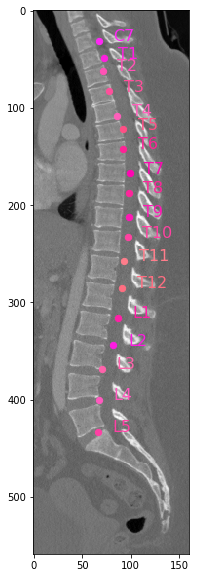

In [6]:
# Draw point
import numpy as np
import random

x_coords = []
y_coords = []
labels = []
for result in yolo_result:
    print(result)
    x_coords.append(result['center_x'])
    y_coords.append(result['center_y'])
    labels.append(result['label'])
    

plt.figure(figsize=(10, 10))
plt.imshow(x[:,:,z], cmap='gray')

for i in range(len(x_coords)):
    color = [1, 0 + random.random()/2, 0.5 + random.random()/2]
    x_coord, y_coord, label = x_coords[i], y_coords[i], labels[i]
    plt.scatter(x = x_coord, y = y_coord, c = color, s = 40)
    plt.text(x_coord + 15, y_coord, label, fontsize=16, color = color)

plt.show()

In [15]:
size = 128

def model():
    import keras
    import os
    import h5py
    os.environ['KERAS_BACKEND']='tensorflow'
    
    def setGPU():
        os.environ["CUDA_VISIBLE_DEVICES"] = "1"
        import tensorflow as tf
        from keras.backend.tensorflow_backend import set_session
        config = tf.ConfigProto()
        #config.gpu_options.per_process_gpu_memory_fraction = 0.5
        config.gpu_options.allow_growth = True
        set_session(tf.Session(config=config))
    setGPU()

    from keras.models import Model
    from keras.layers import Input, Conv3D, MaxPooling3D, UpSampling3D, Concatenate, BatchNormalization, Activation
    
    def conv(input_tensor, depth):
        conv_tensor = Conv3D(depth, 3, padding = 'same', kernel_initializer = 'he_normal')(input_tensor)
        #bn = BatchNormalization()(conv_tensor) # use_bias=False
        output_tensor = Activation('relu')(conv_tensor)
        return output_tensor
    
    def pool(input_tensor):
        output_tensor = MaxPooling3D(pool_size=(2, 2, 2))(input_tensor)
        return output_tensor
    
    def up(input_tensor):
        output_tensor = UpSampling3D(size=(2, 2, 2))(input_tensor)
        return output_tensor
    
    def skip(input_tensor1, input_tensor2):
        output_tensor = Concatenate(axis=-1)([input_tensor1, input_tensor2])
        return output_tensor
    
    input_img = Input(shape=(size, size, size, 1))
    
    conv1 = conv(input_img, 32)
    conv2 = conv(conv1, 64)
    
    pool1 = pool(conv2)
    
    conv3 = conv(pool1, 64)
    conv4 = conv(conv3, 128)
    
    pool2 = pool(conv4)
    
    conv5 = conv(pool2, 128)
    conv6 = conv(conv5, 256)
    
    pool3 = pool(conv6)
    
    conv7 = conv(pool3, 256)
    conv8 = conv(conv7, 512)   

    up1 = up(conv8)
    
    skip1 = skip(conv6, up1)
    
    conv9 = conv(skip1, 256)
    conv10 = conv(conv9, 256)
    
    up2   = up(conv10)
    
    skip2 = skip(conv4, up2)
    
    conv11 = conv(skip2, 128)
    conv12 = conv(conv11, 128)
    
    up3   = up(conv12)
    
    skip3 = skip(conv2, up3)
    
    conv13 = conv(skip3, 64)
    conv14 = conv(conv13, 64)    
   
    conv15 = conv(conv14, 1)

    output_img = conv15

    # model
    model = Model(inputs=input_img, outputs=output_img)
    print (model.output_shape)

    # optimizer
    opt = keras.optimizers.Adam(lr=1e-5)

    model.compile(optimizer=opt,
                  loss='mse',
                  metrics=['accuracy'])
    
    model.summary()
    
    return model

model = model()
model.load_weights('../segmentation/save/model.weights.best.00058.h5')

(None, 128, 128, 128, 1)
__________________________________________________________________________________________________
Layer (type)                    Output Shape         Param #     Connected to                     
input_3 (InputLayer)            (None, 128, 128, 128 0                                            
__________________________________________________________________________________________________
conv3d_31 (Conv3D)              (None, 128, 128, 128 896         input_3[0][0]                    
__________________________________________________________________________________________________
activation_31 (Activation)      (None, 128, 128, 128 0           conv3d_31[0][0]                  
__________________________________________________________________________________________________
conv3d_32 (Conv3D)              (None, 128, 128, 128 55360       activation_31[0][0]              
____________________________________________________________________________________

In [31]:
def generate_seg_result(vertebrae):
    # generate segmentation test data .npy
    shape = x.shape

    #vertebrae = {'label': 'T8', 'left_x': 65, 'top_y': 154, 'center_x': 98, 'center_y': 187, 'w': 67, 'h': 67}

    center_x, center_y = vertebrae['center_x'], vertebrae['center_y']

    size = 128 # patch size = size*size*size
    min_x, max_x, min_y, max_y = center_x - size/2, center_x + size/2, center_y - size/2, center_y + size/2

    range_x = [
        int(min_x if min_x > 0 else 0),
        int(max_x if max_x < (shape[1] - 1) else (shape[1] - 1))
    ]
    range_y = [
        int(min_y if min_y > 0 else 0),
        int(max_y if max_y < (shape[0] - 1) else (shape[0] - 1))
    ]
    range_z = [
        int(z - size/2),
        int(z + size/2)
    ]
    #print(range_x)
    #print(range_y)
    #print(center_x)

    padding_y = (
    int(size/2) - center_y + range_y[0],
    int(size/2) - range_y[1] + center_y
    )
    padding_x = (
        int(size/2) - center_x + range_x[0],
        int(size/2) - range_x[1] + center_x
    )

    out_x = np.pad(
        x[
            range_y[0]: range_y[1]
            , range_x[0]: range_x[1]
            , range_z[0]: range_z[1]],
        (padding_y, padding_x, (0, 0)),
        'constant') / 255

    plt.imshow(out_x[:,:,65], cmap='gray')
    #np.save('./tmp/seg_test_data/{}.npy'.format(vertebrae['label']), out_x)
    
    out_x = np.reshape(out_x, (1, 128, 128, 128, -1))
    
    out_y = model.predict(out_x)
    
    out_y = np.reshape(out_y, (128, 128, 128))
    
    #plt.imshow(out_y[:,:,z], cmap='gray')
    
    return out_y

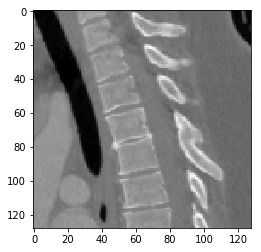

In [33]:
# combine seg result

combine_result = np.zeros(x.shape)

vertebrae = {'label': 'T3', 'left_x': 51, 'top_y': 56, 'center_x': 78, 'center_y': 83, 'w': 54, 'h': 54}
seg_result = generate_seg_result(vertebrae)

#plt.imshow(seg_result[:,:,z], cmap='gray')

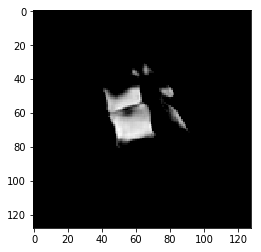

In [30]:
plt.imshow(seg_result[:,:,60], cmap='gray')